# K-means clustering

## import library

In [2908]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2909]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

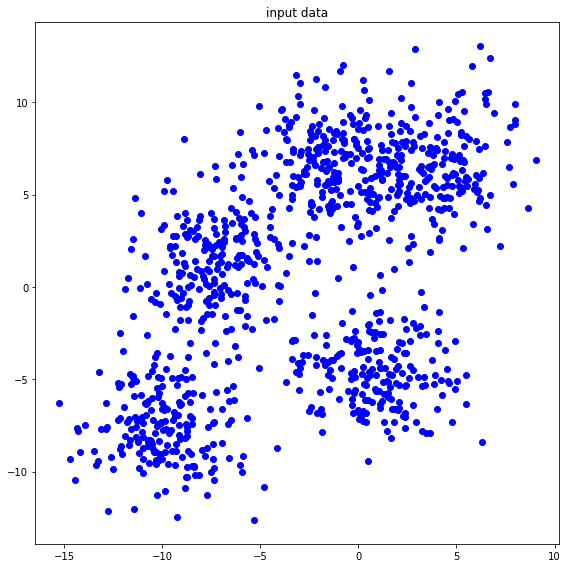

In [2910]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [2911]:
def compute_distance(feature, center):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    difference=feature-center # n x m 
    distance=(difference[:,0]**2+difference[:,1]**2)**(1/2) # n x 1
    # print(center.shape)
    # print(distance.shape)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return distance

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [2912]:
def compute_centroid(feature, label_feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks 
    #
    # print(label_feature.shape)
    # label_feature_temp=np.c_[label_feature,np.ones(len(label_feature))]
    # target_feature=feature[label_feature_temp[:,0] == label]
    # print(label_feature_temp)
    
    # print(label_feature)
    # print(feature)
    target_feature=feature[label_feature == label]
    # print(target_feature)
    if target_feature.any():
        center_x=target_feature[:,0].mean()
        center_y=target_feature[:,1].mean()
        centroid=np.c_[center_x,center_y] # 1 x m
    else:
        return np.array([False])
    # print(centroid.shape) 
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return centroid

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [2913]:
def compute_label(distance):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    label_feature=np.argmin(distance,axis=1)
    # print(label_feature.shape)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return label_feature


## the number of clusters $K = 2$

In [2914]:
number_cluster          = 2
number_iteration        = 20     # you can modify this value
loss_iteration_02       = np.zeros(number_iteration)
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
print(centroid_iteration_02.shape)
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))
print(label_feature_02[0])

(20, 2, 2)
1


In [2915]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
distance = np.zeros((number_data,number_cluster))
centroid = centroid_iteration_02
label_feature=label_feature_02
label=np.array(range(number_cluster))
# print(label)

for iteration in range(number_iteration):
    for i in label:
        center= compute_centroid(feature, label_feature,i) 
        centroid[iteration,i,:] =center
        distance[:,i] = compute_distance(feature, center) #n x 1 -> n x k

    label_feature = compute_label(distance)
    loss=0
    for i in label:
        target_feature=feature[label_feature == i]
        difference=target_feature-centroid[iteration,i,:]
        distance_each=(difference[:,0]**2+difference[:,1]**2)**(1/2)
        loss+=distance_each.mean()

    loss_iteration_02[iteration]     = loss
    # print(loss_iteration_02)
    centroid_iteration_02 = centroid
    label_feature_02  = label_feature

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 4$

In [2916]:
number_cluster          = 4
number_iteration        = 20     # you can modify this value
loss_iteration_04       = np.zeros(number_iteration)
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

In [2917]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
distance = np.zeros((number_data,number_cluster))
centroid = centroid_iteration_04
label_feature=label_feature_04
label=np.array(range(number_cluster))

for iteration in range(number_iteration):
    for i in label:
        center= compute_centroid(feature, label_feature,i) 
        if center.any():
            # print(center)
            centroid[iteration,i,:] =center
            # centroid[iteration,i,:] =centroid[iteration,i-1,:]
        else:
            # centroid[iteration,i,:] =center
            centroid[iteration,i,:] =centroid[iteration,i-1,:]
        center=centroid[iteration,i,:]
        distance[:,i] = compute_distance(feature, center)
        # centroid[iteration,i,:] =center
        # distance[:,i] = compute_distance(feature, center)

    label_feature = compute_label(distance)

    loss=0
    for i in label:
        target_feature=feature[label_feature == i]
        difference=target_feature-centroid[iteration,i,:]
        distance_each=(difference[:,0]**2+difference[:,1]**2)**(1/2)
        loss+=distance_each.mean()

    loss_iteration_04[iteration]     = loss
    # print(loss_iteration_04)
    centroid_iteration_04 = centroid
    label_feature_04  = label_feature

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 8$

In [2918]:
number_cluster          = 8
number_iteration        = 8     # you can modify this value
loss_iteration_08       = np.zeros(number_iteration)
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

In [2919]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
distance = np.zeros((number_data,number_cluster))
centroid = centroid_iteration_08
label_feature=label_feature_08
label=np.array(range(number_cluster))

for iteration in range(number_iteration):
    for i in label:
        
        center= compute_centroid(feature, label_feature,i) 
        if center.any():
            # print(center)
            centroid[iteration,i,:] =center
            # centroid[iteration,i,:] =centroid[iteration,i-1,:]
        else:
            # centroid[iteration,i,:] =center
            centroid[iteration,i,:] =centroid[iteration,i-1,:]
        center=centroid[iteration,i,:]
        distance[:,i] = compute_distance(feature, center)
        # centroid[iteration,i,:] =center
        # distance[:,i] = compute_distance(feature, center)

    label_feature = compute_label(distance)
    
    loss=0
    for i in label:
        target_feature=feature[label_feature == i]
        # print(target_feature)
        difference=target_feature-centroid[iteration,i,:]
        distance_each=(difference[:,0]**2+difference[:,1]**2)**(1/2)
        # print(distance_each)
        if distance_each.any():
            loss+=distance_each.mean()

    loss_iteration_08[iteration]     = loss
    # print(loss_iteration_08)
    centroid_iteration_08 = centroid
    label_feature_08  = label_feature

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 16$

In [2920]:
number_cluster          = 16
number_iteration        = 30   # you can modify this value
loss_iteration_16       = np.zeros(number_iteration)
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

In [2921]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
distance = np.zeros((number_data,number_cluster))
centroid = centroid_iteration_16
label_feature=label_feature_16
label=np.array(range(number_cluster))

for iteration in range(number_iteration):
    for i in label:
        center= compute_centroid(feature, label_feature,i) 
        # print(center)
        if center.any():
            # print(center)
            # centroid[iteration,i,:] =center
            centroid[iteration,i,:] =centroid[iteration,i-1,:]
        else:
            centroid[iteration,i,:] =center
            # centroid[iteration,i,:] =centroid[iteration,i-1,:]
        center=centroid[iteration,i,:]
        distance[:,i] = compute_distance(feature, center)

    label_feature = compute_label(distance)
    loss=0
    for i in label:
        target_feature=feature[label_feature == i]
        difference=target_feature-centroid[iteration,i,:]
        distance_each=(difference[:,0]**2+difference[:,1]**2)**(1/2)
        # print(distance_each)
        if distance_each.any():
            loss+=distance_each.mean()
        # loss+=distance_each.mean()

    loss_iteration_16[iteration]     = loss
    # print(loss_iteration_16)
    centroid_iteration_16 = centroid
    # print(np.isnan(centroid_iteration_16).any())
    label_feature_16  = label_feature

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## functions for presenting the results

---

---

In [2922]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [2923]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [2924]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [2925]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [2926]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [2927]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [2928]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [2929]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [2930]:
colors=['orange','green','purple','brown','pink','olive','gray','cyan','slateblue','peru','darksalmon','indigo','lightpink','goldenrod','deepskyblue','steelblue']
print(len(colors))

16


In [2931]:
def function_result_09():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.plot(centroid_iteration_02[0,:,0],centroid_iteration_02[0,:,1], 'o', color='blue',label='initial')
    plt.plot(centroid_iteration_02[-1,:,0],centroid_iteration_02[-1,:,1], 's', color='red',label='final')
    for i in range(2):
        plt.plot(centroid_iteration_04[:,i,0],centroid_iteration_04[:,i,1], '-', color=colors[i],label=f'cluster={i}')
    plt.legend()
    plt.tight_layout()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [2932]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.plot(centroid_iteration_04[0,:,0],centroid_iteration_04[0,:,1], 'o', color='blue',label='initial')
    plt.plot(centroid_iteration_04[-1,:,0],centroid_iteration_04[-1,:,1], 's', color='red',label='final')
    for i in range(4):
        plt.plot(centroid_iteration_04[:,i,0],centroid_iteration_04[:,i,1], '-', color=colors[i],label=f'cluster={i}')
    plt.legend()
    plt.tight_layout()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [2933]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.plot(centroid_iteration_08[0,:,0],centroid_iteration_08[0,:,1], 'o', color='blue',label='initial')
    plt.plot(centroid_iteration_08[-1,:,0],centroid_iteration_08[-1,:,1], 's', color='red',label='final')
    for i in range(8):
        plt.plot(centroid_iteration_08[:,i,0],centroid_iteration_08[:,i,1], '-', color=colors[i],label=f'cluster={i}')
    plt.legend()
    plt.tight_layout()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [2934]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.plot(centroid_iteration_16[0,:,0],centroid_iteration_16[0,:,1], 'o', color='blue',label='initial')
    plt.plot(centroid_iteration_16[-1,:,0],centroid_iteration_16[-1,:,1], 's', color='red',label='final')
    for i in range(16):
        plt.plot(centroid_iteration_16[:,i,0],centroid_iteration_16[:,i,1], '-', color=colors[i],label=f'cluster={i}')
    plt.legend()
    plt.tight_layout()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [2935]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(2):
        plt.plot(feature[label_feature_02==i][:,0], feature[label_feature_02==i][:,1], 'o', color=colors[i], label=f'class = {i}')
    # plt.plot(feature[label_feature_02==1][:,0], feature[label_feature_02==1][:,1], 'o', color='red', label='class = 1')
    # plt.colorbar()
    plt.tight_layout()
    plt.show()  

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [2936]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(4):
        plt.plot(feature[label_feature_04==i][:,0], feature[label_feature_04==i][:,1], 'o', color=colors[i], label=f'class = {i}')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [2937]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(8):
        plt.plot(feature[label_feature_08==i][:,0], feature[label_feature_08==i][:,1], 'o', color=colors[i], label=f'class = {i}')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [2938]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(16):
        plt.plot(feature[label_feature_16==i][:,0], feature[label_feature_16==i][:,1], 'o', color=colors[i], label=f'class = {i}')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************
final loss (K=2) =  9.9075461089
**************************************************
## [RESULT 02]
**************************************************
final loss (K=4) = 13.7524401908
**************************************************
## [RESULT 03]
**************************************************
final loss (K=8) = 13.9272684266
**************************************************
## [RESULT 04]
**************************************************
final loss (K=16) =  8.1203995309
**************************************************
## [RESULT 05]
**************************************************


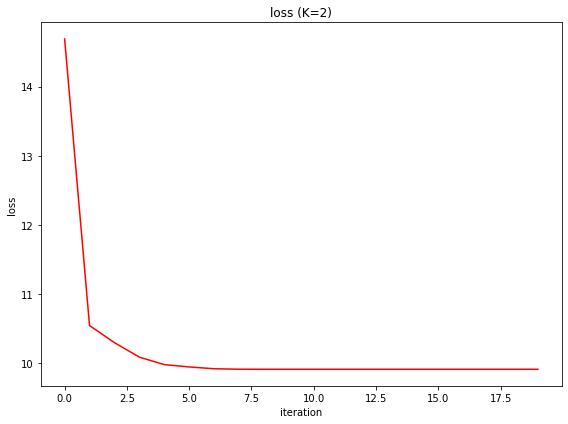

**************************************************
## [RESULT 06]
**************************************************


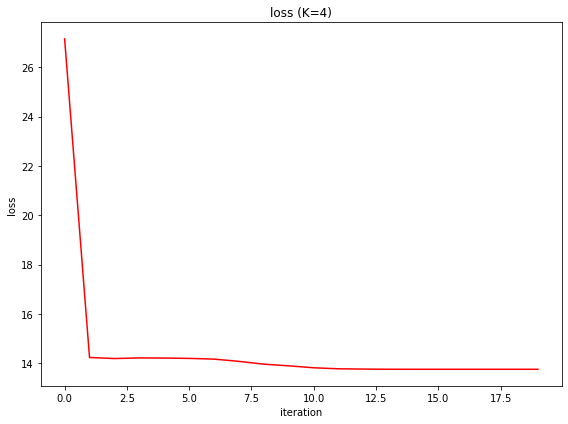

**************************************************
## [RESULT 07]
**************************************************


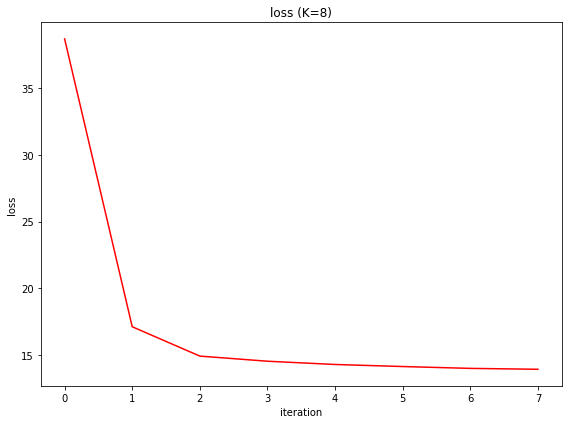

**************************************************
## [RESULT 08]
**************************************************


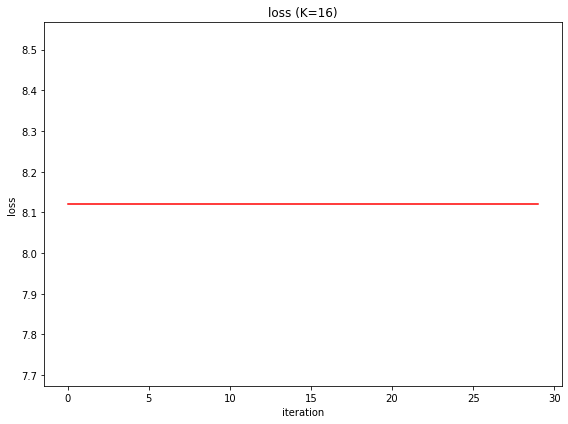

**************************************************
## [RESULT 09]
**************************************************


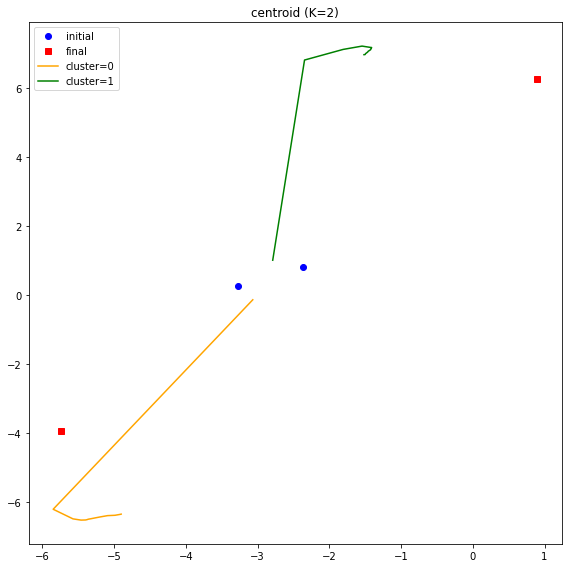

**************************************************
## [RESULT 10]
**************************************************


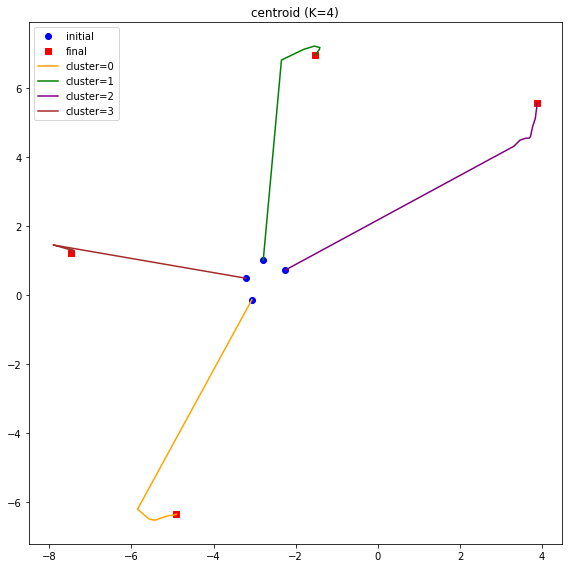

**************************************************
## [RESULT 11]
**************************************************


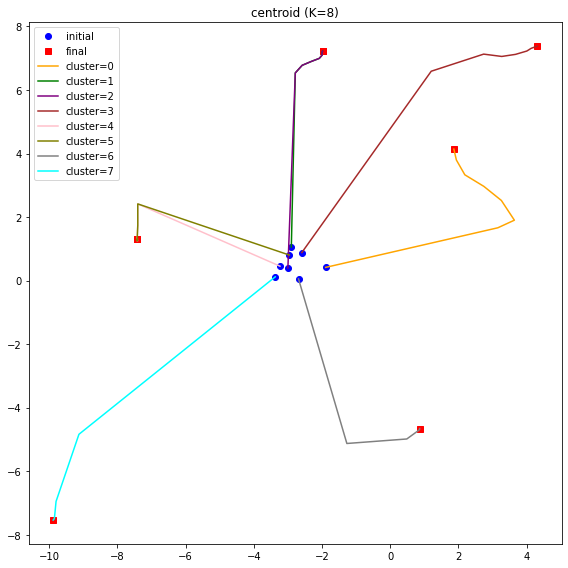

**************************************************
## [RESULT 12]
**************************************************


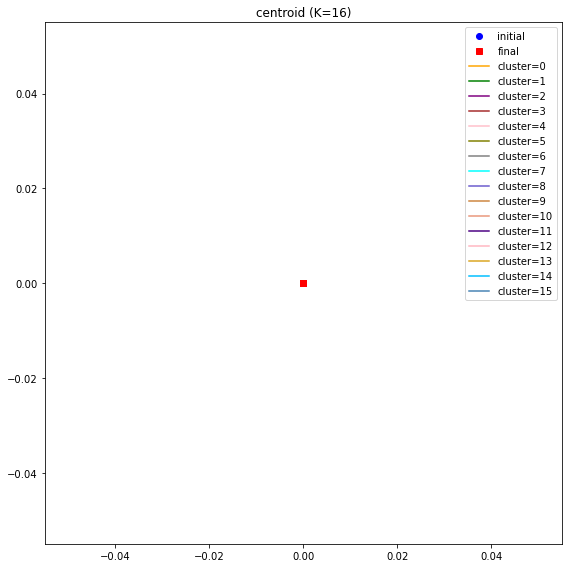

**************************************************
## [RESULT 13]
**************************************************


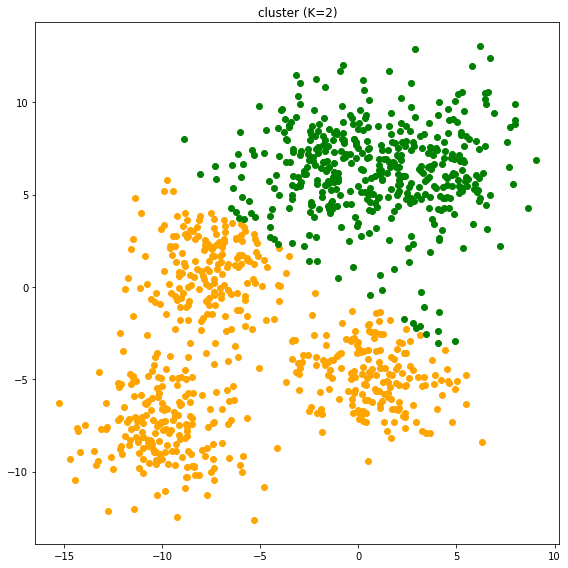

**************************************************
## [RESULT 14]
**************************************************
**************************************************
## [RESULT 15]
**************************************************
**************************************************
## [RESULT 16]
**************************************************


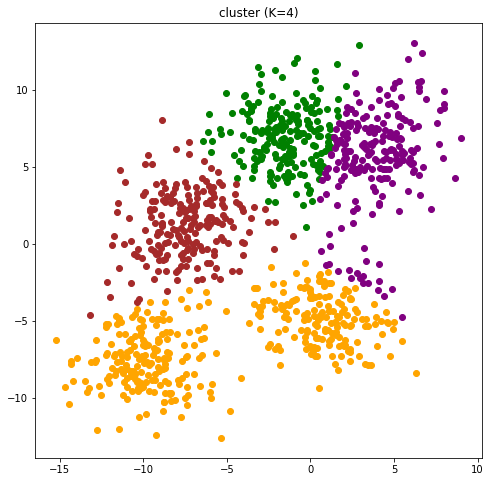

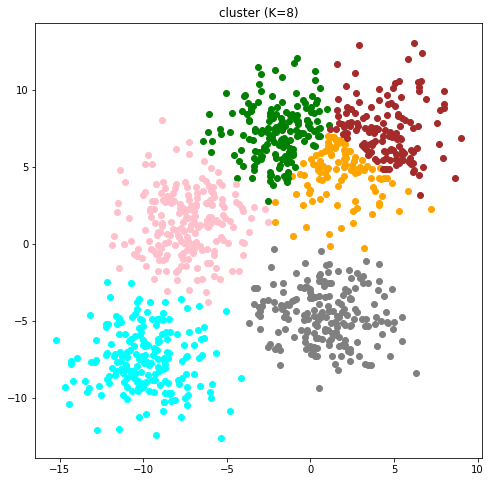

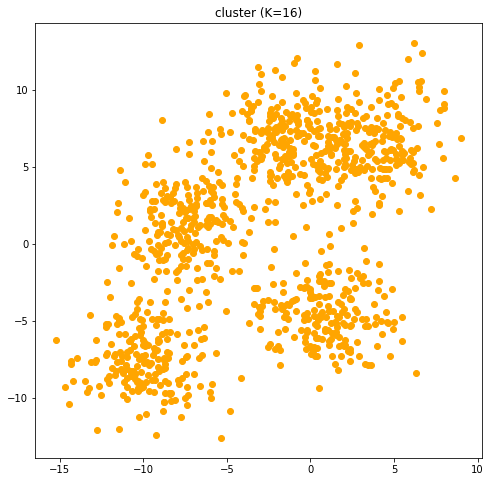

In [2939]:
number_result = 16

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)